## This iterations will observe


1.   Tweaking hyperparameters ( drop out values, batch size and epochs)
2.   Optimise the parameters by changing the number of filter
3.   Experiment with Optimiser and learning rate




In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


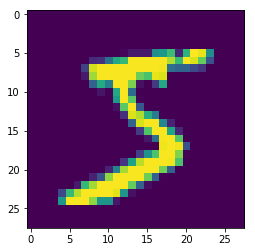

In [225]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [228]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [230]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Conv2D(10, (3,3), activation='relu', input_shape=(28,28,1))) #26x26x16, RF 3x3
model.add(BatchNormalization())


model.add(Conv2D(16, (3,3), activation='relu')) # 24x24x16 , RF 5x5
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(30, (3,3), activation='relu')) # 22x22x32 , RF 7x7
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x32 , RF 14x14
model.add(Conv2D(10, (1, 1), activation='relu')) # 11x11x16
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu')) # 9x9x32 , RF 16x16
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), activation='relu')) # 7x7x64 , RF 18x18
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(10, 1, activation='relu')) # 7x7x8

model.add(Conv2D(10, (3,3), activation='relu')) # 5x5x8 , RF 20x20
model.add(BatchNormalization())
model.add(Conv2D(10, (3,3), activation='relu')) # 3x3x8 , RF 22x22
model.add(BatchNormalization())

model.add(Conv2D(10, 3)) # 1x1x10
model.add(Flatten()) # 1x10
model.add(Activation('softmax'))
 

In [231]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_129 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_130 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_63 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 22, 22, 30)        4350      
_________________________________________________________________
batch_normalization_131 (Bat (None, 22, 22, 30)        120       
__________

In [243]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0032 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0032), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.0032.
60000/60000 [==============================] - 26s 427us/step - loss: 0.0375 - acc: 0.9878 - val_loss: 0.0399 - val_acc: 0.9883
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0024260804.
60000/60000 [==============================] - 9s 143us/step - loss: 0.0295 - acc: 0.9907 - val_loss: 0.0300 - val_acc: 0.9907
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.001953602.
60000/60000 [==============================] - 9s 143us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0297 - val_acc: 0.9909
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0016351559.
60000/60000 [==============================] - 9s 158us/step - loss: 0.0238 - acc: 0.9918 - val_loss: 0.0237 - val_acc: 0.9927
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0014059754.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [245]:
print(score)

[0.0229351354986582, 0.9937]


In [0]:
y_pred = model.predict(X_test)

In [247]:
print(y_pred[:9])
print(y_test[:9])

[[1.5647343e-08 6.8034944e-07 6.1803075e-07 1.7937474e-06 9.2943843e-08
  2.4317124e-08 5.8384328e-14 9.9999666e-01 5.2531774e-11 6.8371250e-08]
 [1.8753135e-09 1.9284989e-06 9.9999809e-01 3.3299452e-10 2.4456480e-11
  1.6743807e-12 1.4233262e-08 3.6497209e-08 1.5350352e-10 7.4291549e-13]
 [4.4313407e-12 9.9999976e-01 8.9280150e-10 8.5866717e-11 5.5546043e-09
  7.9993129e-10 3.2292968e-10 2.0738491e-07 2.7996307e-11 2.8462988e-09]
 [9.9998546e-01 1.6751613e-12 9.5004699e-12 3.1376780e-11 5.6614753e-09
  1.2009300e-08 1.4572467e-05 1.9872576e-10 2.4069198e-08 1.4428819e-08]
 [2.6654844e-12 6.0545774e-12 2.3981685e-12 1.3903997e-11 9.9999940e-01
  5.0260985e-12 7.9157120e-10 2.9032374e-10 5.5976096e-10 5.8225231e-07]
 [1.8696661e-11 9.9999869e-01 5.0154632e-09 7.3398527e-12 3.4494434e-08
  7.3158583e-11 1.9887966e-10 1.3316507e-06 6.9223821e-11 1.8238969e-08]
 [7.4390537e-12 5.2259686e-08 2.3015007e-06 4.2589194e-09 9.9996543e-01
  1.4928965e-08 1.6703191e-09 3.2324158e-06 8.9041649e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [252]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_163'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

## Observation



1.   Increasing batch size reduced training time and improved accuracy.

2.   Tweaking number of epochs and learning rate helped to achieve the required validation. 


